<a href="https://colab.research.google.com/github/LeibGit/-DI_Bootcamp/blob/main/Copy_of_Exercises_XP_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises XP: Introduction to LLMs

Use this guided notebook to follow the platform instructions step by step. Prefilled cells are ready to run; cells containing **TODO** markers need your input.


## 👩‍🏫👩🏿‍🏫 What you’ll learn
- Understand what Large Language Models (LLMs) can do.
- Review the Transformer architecture and the tokenization pipeline.
- Differentiate between pretraining and fine-tuning.
- Generate text with a pretrained language model.


## 🛠️ What you will create
- Markdown answers describing key NLP concepts.
- Python code that loads GPT-2 (or a similar causal LM) and performs basic tokenization and generation.


> **Learning point**
> Work through the exercises sequentially. Run installation cells only once, then focus on filling each TODO before executing the corresponding code.


## 🌟 Exercise 1 · What are Large Language Models?


### 1.1 Define LLMs
TODO: Explain in your own words what LLMs are and what kinds of tasks they are designed to solve.

LLMs are essentially a prediction model. They add attention to each subword of a sentence and predict the next word using this context and a library.

### 1.2 Prefilled · install core libraries
Run once to install `transformers`, `torch`, and supporting utilities exactly as in the enoncé.


In [1]:
%pip install --quiet transformers matplotlib --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 31.3 MB/s eta 0:00:00


### 1.3 Load GPT for causal text generation
Reuse the snippet from the platform: declare the model name, tokenizer, and model weights.


In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

if None in (model_name, tokenizer, model):
    raise ValueError("Fill in model_name, tokenizer, and model before continuing.")

print(f"\nModel '{model_name}' loaded successfully!")
print("""
GPT-2 is a causal language model, meaning it predicts the next word in a sequence.
It has been trained on a diverse dataset and can generate coherent, contextually relevant text.
""")


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]


Model 'gpt2' loaded successfully!

GPT-2 is a causal language model, meaning it predicts the next word in a sequence.
It has been trained on a diverse dataset and can generate coherent, contextually relevant text.



## 🌟 Exercise 2 · Transformer Architecture and Tokenization


TODO: Describe the tokenization process in your own words before coding.


Original Text: The dog is walking on the
Tokens: ['The', 'Ġdog', 'Ġis', 'Ġwalking', 'Ġon', 'Ġthe']
Token IDs: [464, 3290, 318, 6155, 319, 262]


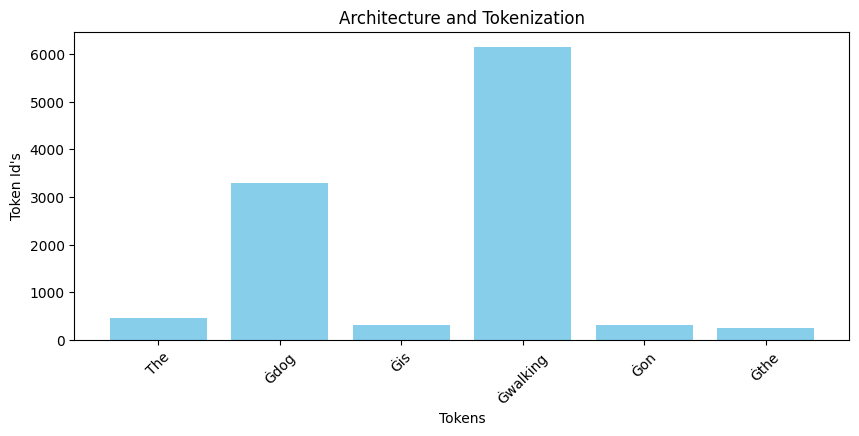

In [13]:
text = "The dog is walking on the"
if text is None:
    raise ValueError("Define the variable `text` with a short sentence.")

tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f"Original Text: {text}")
print(f"Tokens: {tokens}")
print(f"Token IDs: {token_ids}")

x_label = "Tokens"  # TODO: label for the x-axis (e.g., "Tokens")
y_label = "Token Id's"  # TODO: label for the y-axis (e.g., "Token IDs")
title = "Architecture and Tokenization"    # TODO: chart title

if None in (x_label, y_label, title):
    raise ValueError("Set x_label, y_label, and title before plotting.")

plt.figure(figsize=(10, 4))
plt.bar(tokens, token_ids, color="skyblue")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.xticks(rotation=45)
plt.show()

## 🌟 Exercise 3 · Token IDs and special prefixes


In [14]:
print(tokens)
print(token_ids)

['The', 'Ġdog', 'Ġis', 'Ġwalking', 'Ġon', 'Ġthe']
[464, 3290, 318, 6155, 319, 262]


In [17]:
if 'tokens' not in globals() or 'token_ids' not in globals():
    raise ValueError("Run Exercise 2 to define `tokens` and `token_ids` first.")

# TODO: print the token along with its numeric id
token_dict = {}
for token in tokens:
  id = tokenizer.convert_tokens_to_ids(token)
  token_dict[token] = id
token_dict

{'The': 464,
 'Ġdog': 3290,
 'Ġis': 318,
 'Ġwalking': 6155,
 'Ġon': 319,
 'Ġthe': 262}

TODO: In plain language, explain what the `Ġ` prefix indicates in GPT-style vocabularies.


G indicates that the tokenizer is recognizing this as the start of a new word.


## 🌟 Exercise 4 · Generate simple text


Create a fresh prompt, run the generator, and observe how the model extends your sentence token by token.


In [21]:
generator = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    device=0 if torch.cuda.is_available() else -1,
)

input_text = "The dog is sitting in the"
if input_text is None:
    raise ValueError("Set `input_text` before generating.")

gen_kwargs = {
    "max_new_tokens": 10,  # TODO: adjust if you want longer/shorter outputs
    "temperature": 0.5,    # TODO: tune sampling temperature
    "top_p": 0.95,
    "do_sample": True,
}

output_ids = generator(input_text, **gen_kwargs)  # TODO: call the generator
output_text = output_ids[0]["generated_text"]     # TODO: extract the text string

print(f"Input: {input_text}")
print(f"Generated Output: {output_text}")


Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Input: The dog is sitting in the
Generated Output: The dog is sitting in the back seat of the car.

"We


> **Learning point**
> Compare the generated continuation with your expectations. Which knobs (temperature, max tokens) change the style the most?

max_new_tokens changed how many words into the future the model predicted, deeply changing the reponse. The tempurature seemed to affect the creativity of the model.

Here's a summary that can help you decide of how to fix these parameters:

![image.png](https://github.com/user-attachments/assets/a4c444d7-fab8-4f56-b7c7-00a15900cb5a)